## Social Networks Analysis in Python
This tutorial is largely based on the Introduction to [Applied Social Network Analysis in Python course](https://www.coursera.org/learn/python-social-network-analysis/home/week/1) available on Coursera.


### Why Study Networks?

* Centrality in networks can be used to model the impact of a node 
in a network. For instance, how widespread a shock event will be depending on the node from whence it started, such as if the
node is at the centre of the network vs if it were towards the edges.

A shock event could be a conflict, lockdown, etc. E.g. if there is an outbreak, which airports, train/bus stations should be locked down to curtail spread?



In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import pandas as pd
import random
import string


#### Nodes and Edges


Nodes represent entities in a network, such as companies. They are also called vertices. Edges are the connections between nodes or vertices. In production networks, edges can represent relationships between firms. The weight of an edge can represents relationship information such as number or value of transations between a pair of nodes.


### Directed vs undirected networks (asymmetric and symmetric networks)

In directed networks, the order matters e.g. graph of buyer-supplier relationships, where transactions flow from the supplier to the buyer. Or the network of eployees in a company and the number of emails they sent. Since email represents sender/receiver relationship that must specify who the sender and receiver are, email networks are *directed*. 

In undirected networks, the relationship is symmetrical and order is not important.

The [networkx package](https://networkx.org) is used to create, manipulate and study networks in Python.

To create **undirected graphs**:

`G = nx.Graph()`

Add edges -- this automatically creates the network nodes in nx.

`G.add_edge('A', 'B')`
`G.add_edge('C', 'D')`

Create **directed graphs**:
`G = nx.DiGraph()`
`G.add_edge('A', 'B')` - relationship frlows from A to B
`G.add_edge('C', 'D')` - relationship frlows from C to D.


### Weighted vs unweighted networks
Not all networks are of equal importantance. In **weighted** networks,
the edges are assigned a numerical weight that has some meaning in the 
relationship. To assign such a value, specify an additional weight argument when creating 
the edges.

`G.add_edge('A', 'B', weight = 5)`
`G.add_edge('C', 'D', weight = 45)`

**Edges** can have many other attributes such as *relation* e.g. family, friend, coworker, 


### Multigraphs
Here, two nodes are connected by multiple edges. E.g. one edge represents 
`relation = friend`, another `relation = coworker`, yet another`relation = neighbour`.

To create a multigraph, instantiate the graph class as a multigraph. Note that the following network has only two nodes but multiple edges:
`G = nx.MultiGraph()`
`G.add_edge('A', 'B', relation = 'coworker')`
`G.add_edge('A', 'B', weight = 13, relation = 'family',)` 
`G.add_edge('A', 'B', relation = 'friend')`

## Examples

In [2]:
# Creating undirected graphs
G = nx.Graph() #create a graph object
G.add_edge('A', 'B') 
G.add_edge('C', 'D')

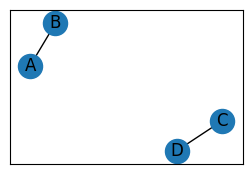

In [3]:
# Visualise the graph

plt.figure(figsize=(3, 2))
nx.draw_networkx(G)

In [4]:
# Directed graphs
G1 = nx.DiGraph() #creating a graph object
G1.add_edge('A', 'B')
G1.add_edge('C', 'D')

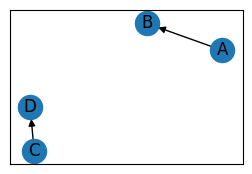

In [6]:
# Visualise the graph

plt.figure(figsize=(3, 2))
nx.draw_networkx(G1)

In [15]:
# Creating multigraphs
G2 = nx.MultiGraph() #creating a graph object
G2.add_edge('A', 'B', relation = 'coworker')
# G2.add_edge('A', 'B', relation = 'flatmate')
G2.add_edge('A', 'C', weight = 13, relation = 'family')
G2.add_edge('A', 'D', relation = 'friend')


0

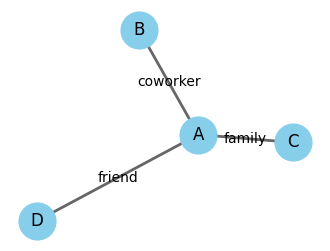

In [17]:
# Plotting the multigraph
plt.figure(figsize=(4, 3))

# Spring layout, might need adjustments
pos = nx.spring_layout(G2)

# Draw nodes with labels
nx.draw_networkx_nodes(G2, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_labels(G2, pos, font_size=12, font_family="sans-serif")

# Draw edges
nx.draw_networkx_edges(G2, pos, width=2, alpha=0.6, edge_color="black")

# Draw edge labels separately for each edge
for u, v, d in G2.edges(data=True):
    for key, attr in d.items():
        if key == 'relation':  # Check if the attribute is 'relation'
            x = (pos[u][0] + pos[v][0]) / 2  # x-coordinate of label
            y = (pos[u][1] + pos[v][1]) / 2  # y-coordinate of label
            plt.text(x, y, attr,  # 'attr' is the label itself
                     horizontalalignment='center', verticalalignment='center')

plt.axis("off")
plt.show()

In [18]:
# Creating undirected graphs with edge weights
G3 = nx.Graph()

G3.add_edge('A', 'B', weight = 21)
G3.add_edge('C', 'D', weight = 23)

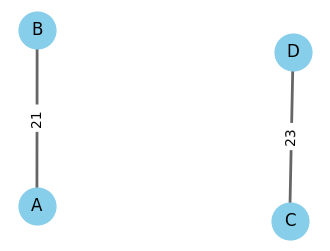

In [25]:
# Visualise the graph

# Plotting the graph
plt.figure(figsize=(4, 3))

# Spring layout, might need adjustments
pos = nx.spring_layout(G3)

# Draw nodes
nx.draw_networkx_nodes(G3, pos, node_size=700, node_color="skyblue")

# Draw edges with weights
nx.draw_networkx_edges(G3, pos, width=2, alpha=0.6, edge_color="black")
labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=labels)

# Draw labels for nodes
nx.draw_networkx_labels(G3, pos, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

### Accessing Edges and Attributes of the network - undirected case

In [26]:
# Create a graph object
G = nx.Graph()

# Add edges and attributes
G.add_edge('A', 'B', weight = 5, relation = 'friend')
G.add_edge('C', 'D', weight = 13)

# List all edges of the network
list(G.edges())


[('A', 'B'), ('C', 'D')]

In [28]:
# List all edges and attributes
list(G.edges(data = True))

[('A', 'B', {'weight': 5, 'relation': 'friend'}), ('C', 'D', {'weight': 13})]

List edges and attributes that meet a given condition:

In [29]:

# create a graph object
G4 = nx.Graph()

# Add edges to the graph
G4.add_edge('E', 'F', weight = 13, relation = 'fam')

# List edges where the edges have a particular attribute
list(G4.edges(data = 'relation'))

[('E', 'F', 'fam')]

In [30]:

# create a graph object
G5 = nx.Graph()

# Add edges and attributes
G5.add_edge('A', 'B', weight = 5, relation = 'friend')

# List attributes of given edges of interest
G5.edges['A', 'B']

# NOTE: `G5.edges['A', 'B']` will return an error if I created other nodes of G as follows: `G.add_edge('A', 'B', weight = 5, relation = 'friend')`

{'weight': 5, 'relation': 'friend'}

In [32]:
# Remove edges from a graph

G.remove_edge('A', 'B')

G.remove_edge('C', 'D')

### Accessing Edges and Attributes of the network - directed graphs

In [33]:
#Create a graph object
G7 = nx.DiGraph()

# Add edges
G7.add_edge('P', 'Q', weight = 5, relation = 'friend')

# Return named attributes 
G7.edges['P', 'Q']['weight']

# If order of the edges were reversed, an error ensues e.g.
# G7.edges['Q', 'P']['weight'] #results in a KeyError 'P'

5

### Accessing Edges and Attributes of the network - Multigraphs

#### Undirected Case

In [34]:
# Create multigraph object

G8 = nx.MultiGraph()

# Add edges
G8.add_edge('A', 'B', weight = 5, relation = 'friend')
G8.add_edge('A', 'B', weight = 12, relation = 'family')
G8.add_edge('C', 'B', weight = 7, relation = 'colleague')

# Access edge attributes
dict(G8['A']['B']) #returns a dictionary of attributes per (A,B) edge

{0: {'weight': 5, 'relation': 'friend'},
 1: {'weight': 12, 'relation': 'family'}}

Get specific attribute for a selected edge e.g. first edge [0]

In [36]:
# G8['A']['B'] # returns attributes for all (A,B) edges

G8['A']['B'][0] #returns attributes for the first (A,B) edge


{'weight': 5, 'relation': 'friend'}

#### - Directed Case

In [39]:
# Create a directed multigraph object
G9 = nx.MultiDiGraph()

# Add edges and attributes
G9.add_edge('A', 'B', weight = 5, relation = 'friend')
G9.add_edge('A', 'B', weight = 12, relation = 'family')
G9.add_edge('C', 'B', weight = 6, relation = 'colleague')

G9.edges

# Access edges and attributes
G9['A']['B'][0]['weight']



5

## Attributes of Nodes

It's also possible to add attributes to nodes. Note that so far, nodes have been created implictly through
the creation of edges. However, to add attributes, the network nodes need to be created explicitly.

In [40]:
# Create a graph object
G0 = nx.Graph()

# Add edges and attributes
G0.add_edge('A', 'B', weight = 5, relation = 'friend')
G0.add_edge('B', 'C', weight = 13, relation = 'family')

# Add node attributes
G0.add_node('A', role = 'scientist')
G0.add_node('B', role = 'teacher')
G0.add_node('C', role = 'banker')



### Accessing node attributes

In [41]:
# List all nodes
# G0.nodes

# List nodes and node attributes
G0.nodes(data=True)

NodeDataView({'A': {'role': 'scientist'}, 'B': {'role': 'teacher'}, 'C': {'role': 'banker'}})

In [42]:
# List nodes and node attributes
list(G0.nodes(data=True))

[('A', {'role': 'scientist'}),
 ('B', {'role': 'teacher'}),
 ('C', {'role': 'banker'})]

In [43]:
# Access role of a particular node
G0.nodes['A']['role']

'scientist'

### Other Options for Creating Network Graphs

#### From a list of tuples

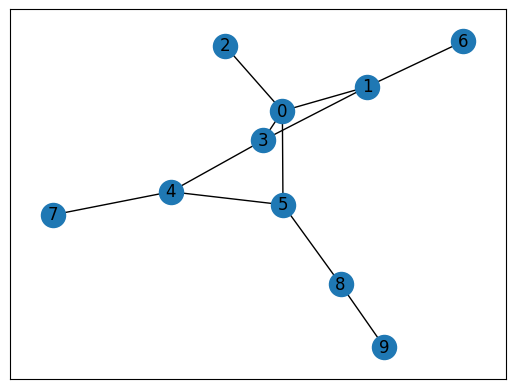

In [2]:
Gt = nx.Graph()

# add node/edge pairs
Gt.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# visualise the graph
nx.draw_networkx(Gt)

Adjacency refers to the relationship between two nodes in a graph that are directly connected by an edge. If two vertices are connected by an edge, they are said to be adjacent.

We can build the adjacency list for the graph Gt by counting the number of nodes connected to it e.g. node 0 has a adjacency of 4, node 1 has adjacency of 2, etc.

A network can be built from an edgelist, which can be used to represent graphs with simple edge attributes and without node attributes. This format is not good for networks with isolated nodes.

In [6]:
# View the edgelist

!cat Gt_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [11]:
# The `read_edgelist`` function can be used to read a graph from an edgelist
Ge = nx.read_edgelist('Gt_edgelist.txt', data = [('weight', int)])

# Return the network edges and attributes
Ge.edges(data = True)

EdgeDataView([('0', '1', {'weight': 4}), ('0', '2', {'weight': 3}), ('0', '3', {'weight': 2}), ('0', '5', {'weight': 6}), ('1', '3', {'weight': 2}), ('1', '6', {'weight': 5}), ('3', '4', {'weight': 3}), ('5', '4', {'weight': 1}), ('5', '8', {'weight': 6}), ('4', '7', {'weight': 2}), ('8', '9', {'weight': 1})])

### Network graphs from Pandas dataframes
Graphs can be built from pandas dataframe. We can reuse the edgelist file to build a dataframe and creat the network by reading in the data using the `from_pandas_edgelist` function


In [9]:
# First read the edgelist file into a pandas dataframe
G_df = pd.read_csv('Gt_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [12]:
Gp = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
Gp.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Build a graph given a dataset
Here I will generate some random dataset with typical supply chain relations and show how to build a network given this dataset. I have purposely included duplicate connections and relationships.

In [78]:
# Set parameters to generate dataframe
num_rows = 100
id_length = 4
# Define the type of relationship between entities, with 65% as suppliers
relationship_types = ["SUPPLIER", "COMPETITOR", "OTHER"]
relationship_prob = [0.65, 0.25, 0.10]
years = list(range(2016, 2024))
# Limit transactions between $1m dollars and $1.5B
transaction_value_range = (1, 1500)
# Introduce some duplicates in the data if needed
# duplicate_percentage = 0.02


# Create a function to generate random IDs for buyers and supplier
def generate_id(existing_ids):
    characters = string.ascii_letters + string.digits + string.punctuation
    while True:
        new_id = ''.join(random.choices(characters, k=id_length))
        if new_id not in existing_ids:
            return new_id


# Generate unique pairs
data = {
    "source_id": [],
    "dst_id": [],
    "relationship_type": [],
    "year": [],
    "transaction_values": []
}

existing_ids = set()


# Generate connections for the source_ids with multiple dst_ids
source_ids_with_multiple_dst = random.sample(range(1, 101), 7)  # 7 out of 100 will have multiple dst_ids
for source_id in source_ids_with_multiple_dst:
    num_dst_ids = random.randint(5, 12)
    existing_ids.add(str(source_id))
    for _ in range(num_dst_ids):
        dst_id = generate_id(existing_ids)
        relationship_type = np.random.choice(relationship_types, p=relationship_prob)
        year = random.choice(years)
        transaction_value = random.randint(*transaction_value_range)
        
        data["source_id"].append(str(source_id))
        data["dst_id"].append(dst_id)
        data["relationship_type"].append(relationship_type)
        data["year"].append(year)
        data["transaction_values"].append(transaction_value)
        existing_ids.add(dst_id)

# Generate connections for other source_ids
for source_id in range(1, 101):
    if str(source_id) not in existing_ids:
        num_dst_ids = random.randint(1, 4)  # The rest will have 1 to 4 dst_ids
        for _ in range(num_dst_ids):
            dst_id = generate_id(existing_ids)
            relationship_type = np.random.choice(relationship_types, p=relationship_prob)
            year = random.choice(years)
            transaction_value = random.randint(*transaction_value_range)
            
            data["source_id"].append(str(source_id))
            data["dst_id"].append(dst_id)
            data["relationship_type"].append(relationship_type)
            data["year"].append(year)
            data["transaction_values"].append(transaction_value)
            existing_ids.add(dst_id)

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,source_id,dst_id,relationship_type,year,transaction_values
0,52,",|*u",SUPPLIER,2016,715
1,52,t#A*,COMPETITOR,2017,957
2,52,x)Sr,SUPPLIER,2023,13
3,52,*^tK,COMPETITOR,2021,685
4,52,"`s""b",OTHER,2018,1394


Typically the data will not be clean, so you would perform extensive exploratory analysis (counting, aggregation, summary stats, etc.) to understand data and then clean it (deal with missing/incosistent values and duplicates, select the columns/variables you want to work with, convert data types, etc.) E.g. to build a graph of buyer-supplier relationships, you can look at unique connections between firms. This requires checking for duplicate relationships and removing them.

In [77]:
# Check for duplicate relationships - count occurrences of each source_id-dst_id pair
pair_counts = df.groupby(['source_id', 'dst_id']).size().reset_index(name='count')
# Sort to show how many times each appear (also shows which suppliers and buyers are more connected)
pair_counts = pair_counts.sort_values(by='count', ascending=False)
pair_counts


,source_id,dst_id,count
0,1,[ox},1
217,76,E#|f,1
197,69,io(5,1
196,68,~IIE,1
195,68,n4!-,1
...,...,...,...
96,42,3x#b,1
95,41,yEv/,1
94,41,R*i-,1
93,40,}z@W,1


In [57]:
# Check for duplicates based on source_id and dst_id pairs
duplicates = df.duplicated(subset=['source_id', 'dst_id'], keep=False)
if duplicates.any():
    print("\nDuplicates found:")
    print(f' Duplicates found: {df[duplicates]}')

# Drop duplicates and keep the first occurrence
df_unique = df.drop_duplicates(subset=['source_id', 'dst_id'], keep='first')

### Build the graph
Extract only records where the source is a supplier to build their supply chain network.

In [59]:
# Select only suppliers
df_unique = df_unique[df_unique['relationship_type'] == "SUPPLIER"]

# Create a directed graph object
Gs = nx.DiGraph()

# Add edges with weights to the graph by iterating through dataframe
for _, row in df_unique.iterrows():
    Gs.add_edge(row['source_id'], row['dst_id'], weight=row['transaction_values'])

# Display the edges with weights
edges_with_weights = Gs.edges(data=True)

#### Visualising the network
The networkx package has functions for visualising the graph. Getting a good visual requires some data manipulation to alias entity nodes, otherwise the graph will be too cluttered (as in the one below). You can also play around with the figure parameters (it's based on matplotlib so easy to modify).

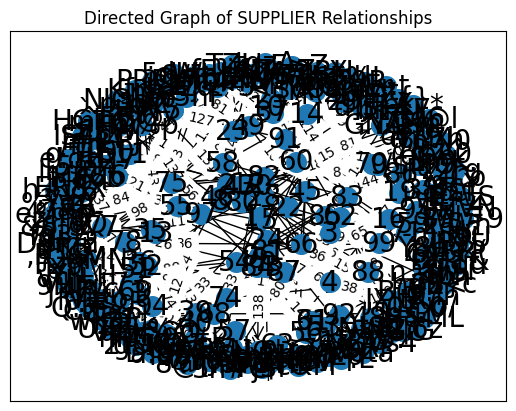

In [74]:
# Visualise the graph
# Positions for all nodes using the default layout (spring_layout)
pos = nx.spring_layout(Gs)  

# Draw the nodes
nx.draw_networkx_nodes(Gs, pos, node_size=200)

# Draw the edges
nx.draw_networkx_edges(Gs, pos, edgelist=Gs.edges(data=True), arrowstyle='->', arrowsize=20)

# Draw node labels
nx.draw_networkx_labels(Gs, pos, font_size=20, font_family='sans-serif')

# Get edge labels (transaction values)
edge_labels = nx.get_edge_attributes(Gs, 'weight')
# Draw edge labels
nx.draw_networkx_edge_labels(Gs, pos, edge_labels=edge_labels)

plt.title("Directed Graph of SUPPLIER Relationships")
plt.show()


In [75]:
# Calculate the network metrics: in-degree, out-degree, average degree and degree distribution
in_degree = dict(Gs.in_degree())

# Convert the in_degree to a dataframe and display the connections in a sorted order
in_degree_df = pd.DataFrame.from_dict(in_degree, orient='index', columns=['in_degree'])

# Sort DataFrame by in-degrees in descending order
in_degree_df = in_degree_df.sort_values(by='in_degree', ascending=False)
in_degree_df

,in_degree
|&%p,1
3afa,1
Y^.L,1
tquQ,1
^EB@,1
...,...
40,0
39,0
38,0
37,0


In [63]:
# Calculate out-degree
out_degree = dict(Gs.out_degree())

# Convert out-degree to DataFrame
out_degree_df = pd.DataFrame.from_dict(out_degree, orient='index', columns=['out_degree'])

# Sort DataFrame by out-degrees in descending order
out_degree_df = out_degree_df.sort_values(by='out_degree', ascending=False)
out_degree_df



,out_degree
13,6
82,6
23,5
24,4
28,4
...,...
gRHu,0
fF}d,0
PzZ~,0
B?5S,0


In [64]:
# Find the average degree
avg_degree = sum(dict(Gs.degree()).values()) / len(Gs)
print(f'Average degree: {avg_degree}')

Average degree: 1.3588850174216027


In [72]:
# Calculate the degree distribution
degree_distribution = dict(Gs.degree())

# Count number of nodes that has the distribution

# Initialize a dictionary to store the count of nodes for each degree
node_count_per_degree = {}

# Iterate over the degree distribution dictionary
for degree in degree_distribution.values():
    # Increment the count for the current degree
    node_count_per_degree[degree] = node_count_per_degree.get(degree, 0) + 1

# Display the count of nodes for each degree
print("Node count per degree:")
for degree, count in node_count_per_degree.items():
    print(f"Degree {degree}: {count} nodes")


Node count per degree:
Degree 4: 9 nodes
Degree 1: 229 nodes
Degree 5: 1 nodes
Degree 6: 2 nodes
Degree 3: 16 nodes
Degree 2: 30 nodes


### Bipartite Graphs
These are graphs whose nodes can be split into two sets, L and R, such that every edge connects a node in L with a node in R.


In [44]:
# Building bipartite graphs
#NetworkX doesn't have a specific class for bipartite graphs, but it has a set of algorithms to facilitate their
# study and analysis

from networkx.algorithms import bipartite

# Create a graph class - generic graph class since no specific class for bipartites
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0) #use add_nodes_from syntax to create nodes from a list and add bipartite arg
B.add_nodes_from([1, 2, 3, 4], bipartite=1)
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)]) #multiple edges can go from nodes in one set
# to a node in another set

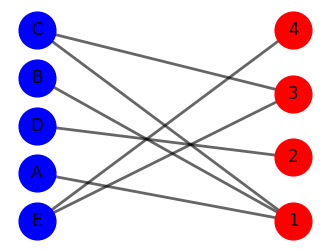

In [30]:

# Visualise the graph
plt.figure(figsize=(4, 3))

# Using bipartite layout
pos = nx.bipartite_layout(B, ['A', 'B', 'C', 'D', 'E'])  

# Draw nodes with different colors for each set
nx.draw_networkx_nodes(B, pos, nodelist=['A', 'B', 'C', 'D', 'E'], node_color='b', node_size=700)
nx.draw_networkx_nodes(B, pos, nodelist=[1, 2, 3, 4], node_color='r', node_size=700)

# Draw edges
nx.draw_networkx_edges(B, pos, width=2, alpha=0.6, edge_color="black")

# Draw labels for nodes
nx.draw_networkx_labels(B, pos, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

In [45]:
# B.nodes

B.edges

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [46]:
# Check if a graph is bipartite
bipartite.is_bipartite(B)

True

In [47]:
# Check if a set of nodes is a bipartition of the graph e.g.
X = set([1,2,3,4])

# check if X is a bipartition of B
bipartite.is_bipartite_node_set(B, X)


True

In [48]:
# View connected components of a bipartite graph
list(nx.connected_components(B))

[{1, 3, 4, 'A', 'B', 'C', 'E'}, {2, 'D'}]

### Properties of Bipartite Graphs



#### Projected (Bipartite) Graphs
Create graphs based on relationships that exist in bipartite graphs. E.g. if set L above (`A - E') represent fans and set R represent teams,
projections can be used to link fans who like the same teams, or link teams supported by the same fans. This could be important for 
marketing: fans supporting the same teams are likely to like same or similar products!

So, we have:
*L-Bipartite graph projection*: network of nodes in L whereby a pair of nodes is connected if they have a common neighbour
in R in the bipartite graph. See the following cells for how to create projections.


In [50]:
# Create projected graphs from bipartite graphs

# Create a graph class
H = nx.Graph()

# add edges from a list of tuples
H.add_edges_from([('A', 1),
                  ('B', 1),
                  ('C', 1),
                  ('D', 1),
                  ('H', 1),
                  ('B', 2),
                  ('C', 2),
                  ('D', 2),
                  ('E', 2),
                  ('G', 2),
                  ('E', 3),
                  ('F', 3),
                  ('H', 3),
                  ('J', 3),
                  ('E', 4),
                  ('I', 4),
                  ('J', 4)
])

# Create set of nodes of the L graph
X = set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

# Project the graph 
P = bipartite.projected_graph(H, X)

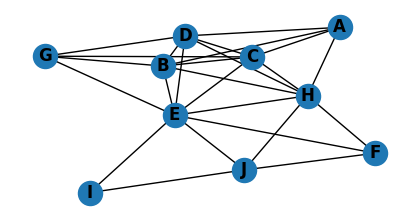

In [71]:
# Plot the graph
plt.figure(figsize=(4, 2))
nx.draw(P, with_labels=True, font_weight='bold') #uses the default spring_layout
plt.show()

In [33]:
# Create a network of the teams using a projection of the teams set
X = set([1,2,3,4])
P = P = bipartite.projected_graph(H, X)

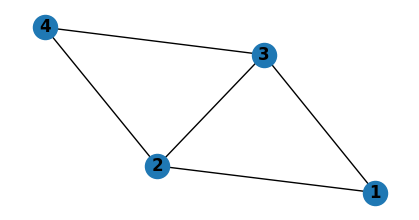

In [8]:
# Plot the graph
plt.figure(figsize=(4, 2))
nx.draw(P, with_labels=True, font_weight='bold')
plt.show()

#### L-Bipartite Weighted Graph Projection
This is used to represent an L-Bipartite Graph Projection with weights on the edges that are proportional to the common neighbours
between the nodes. E.g. to represent how many fans a team has in common.

In [34]:
# L-Bipartite Weighted Graph Projection

# create the projection set
X = set([1,2,3,4])
P = bipartite.weighted_projected_graph(H, X)


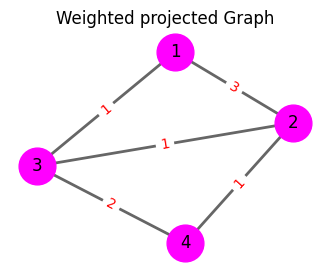

In [35]:
# Visualise the weighted projected graph P
plt.figure(figsize=(4, 3))

# Using spring layout
pos_P = nx.spring_layout(P)

# Draw the nodes
nx.draw_networkx_nodes(P, pos_P, node_size=700, node_color="magenta")

# Draw edges with weights
nx.draw_networkx_edges(P, pos_P, width=2, alpha=0.6, edge_color="black")

# Draw edge labels with weights
edge_labels = {(u, v): d['weight'] for u, v, d in P.edges(data=True)}
nx.draw_networkx_edge_labels(P, pos_P, edge_labels=edge_labels, font_color='red')

# Draw  node labels
nx.draw_networkx_labels(P, pos_P, font_size=12, font_family="sans-serif")

plt.title('Weighted projected Graph')
plt.axis("off")
plt.show()

## Working in Pyspark
When working with Big Data, Pandas is unsuitable as the data is too big to hold in the computer's memory. Most distributed computing environments provide packages for creating and manipulating graphs e.g. Apache Spark provides a GraphX API for graphs and parallel computing. Pyspark uses the [GraphFrame](https://graphframes.github.io/graphframes/docs/_site/index.html) package to based on GraphX for all things graphs. When you want to visualise, you can convert the subset of data to visualise to pandas and use networkx as above.